In [1]:
#linearRegression

In [5]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/Kwashieman_Cluster of Schools.csv")

# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values
df.dropna(inplace=True)

# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Convert units if needed
df['PM2.5'] = df['PM2.5'].apply(lambda x: x * 1000 if x < 1 else x)  # Convert µg/m³ to ng/m³ if necessary

# Save the cleaned data to a new CSV file
df.to_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv", index=False)

# Display the cleaned DataFrame
print(df.head())
import pandas as pd

# Load the cleaned data into a DataFrame
df_cleaned = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Display the first few rows and column names
print(df_cleaned.columns)
print(df_cleaned.head())

# Check for missing values in specific columns
focused_columns = ['PM10', 'PM2.5', 'DATE', 'LOCATION']  # Replace with your actual column names
missing_values_in_focused_columns = df_cleaned[focused_columns].isnull().sum()
print(missing_values_in_focused_columns)

# Save the cleaned data to a new CSV file
df.to_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv", index=False)


LOCATION     0
DATE         0
AQI          0
AQI_Level    0
PM2.5        0
PM10         0
dtype: int64
                                     LOCATION              DATE  AQI  \
0  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 23:43   57   
1  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 23:13   52   
2  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 22:43   52   
3  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 22:13   20   
4  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 21:43   20   

  AQI_Level      PM2.5       PM10  
0  moderate  14.885715  16.314285  
1  moderate  12.500000  13.027778  
2  moderate  12.448276  13.241380  
3      good   4.806452   4.806452  
4      good   4.870968   4.870968  
Index(['LOCATION', 'DATE', 'AQI', 'AQI_Level', 'PM2.5', 'PM10'], dtype='object')
                                     LOCATION              DATE  AQI  \
0  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 23:43   57   
1  Ablekuma_North_Kwash

In [2]:
import pandas as pd
# Load the dataset from the CSV file
data = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Print the first five rows of the dataset
print(data.head())

                                     LOCATION              DATE  AQI  \
0  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 23:43   57   
1  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 23:13   52   
2  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 22:43   52   
3  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 22:13   20   
4  Ablekuma_North_Kwashieman_ClusterOfSchools  11/16/2023 21:43   20   

  AQI_Level      PM2.5       PM10  
0  moderate  14.885715  16.314285  
1  moderate  12.500000  13.027778  
2  moderate  12.448276  13.241380  
3      good   4.806452   4.806452  
4      good   4.870968   4.870968  


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Ensure the 'Date' column is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Create and fit the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict the AQI values using the model
y_pred = linreg.predict(X_test)

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['DATE'] = df.iloc[X_test.index]['DATE']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_linear'] = y_pred

# Reorder columns to have 'Date' at the beginning
df_test = df_test[['DATE', 'PM2.5', 'PM10', 'Observed_AQI', 'Predicted_linear']]

# Save the Linear Regression results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/Kwashieman pred_of_linear.csv", index=False)


In [12]:
linreg.coef_

array([-0.04396842,  1.69276651])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

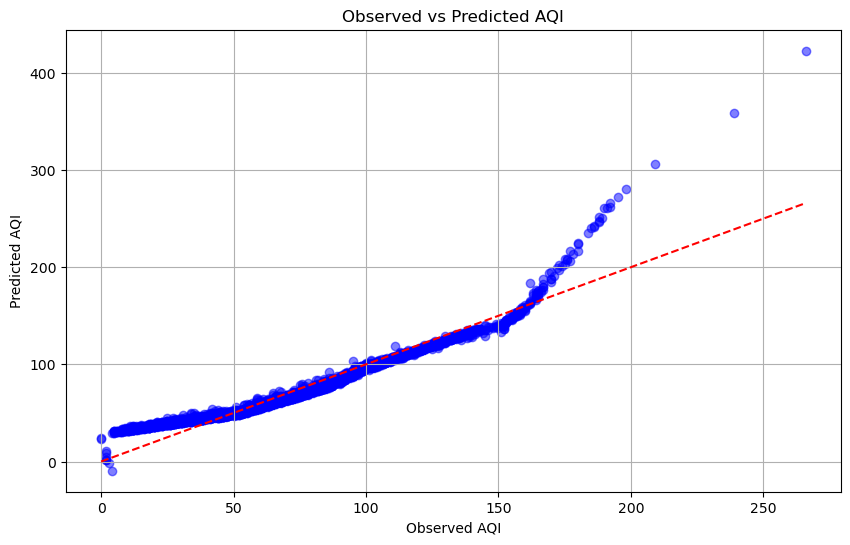

Mean absolute error: 6.707104309862716
Root Mean Square Error: 9.771754634109564
R-squared: 0.927621443846536


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Convert 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize and fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(scaled_X_train, y_train)

# Predict the AQI values
ypred = linear_model.predict(scaled_X_test)

# Ensure y_test and ypred have the same length
assert len(y_test) == len(ypred), "y_test and ypred have different lengths"

# Plotting observed vs predicted values using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ypred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Observed AQI')
plt.ylabel('Predicted AQI')
plt.title('Observed vs Predicted AQI')
plt.grid(True)
plt.show()

# Calculate and print regression metrics
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, ypred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, ypred))))
print('R-squared: {}'.format(r2_score(y_test, ypred)))

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['DATE'] = df.iloc[X_test.index]['DATE']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_LR'] = ypred

# Save the Linear Regression results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/Kwashieman pred_of_linear.csv", index=False)


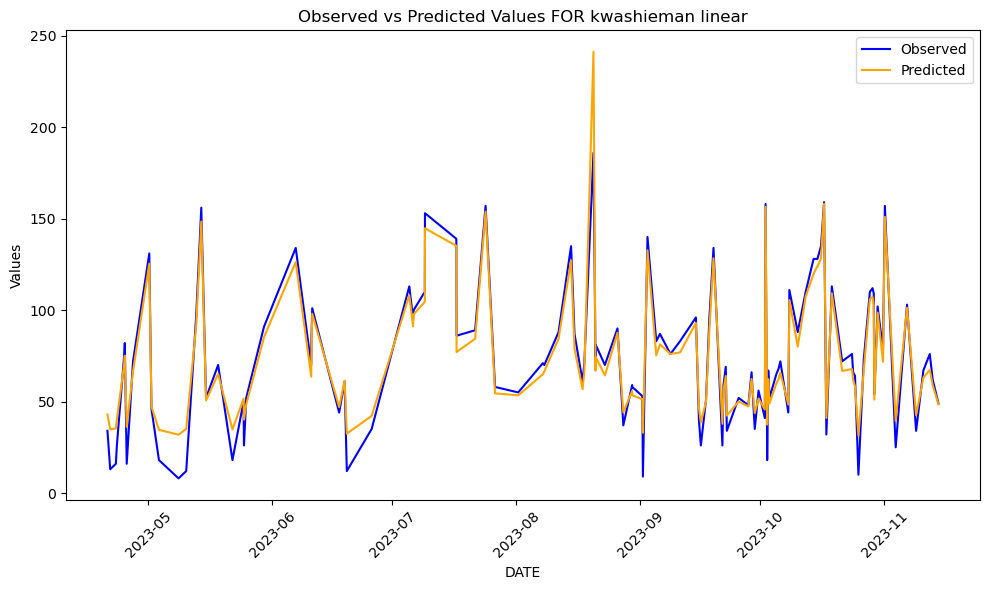

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/Kwashieman pred_of_linear.csv")

# Ensure the 'Date' column is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Check if the dataset has the necessary columns
required_columns = ['DATE', 'Observed_AQI', 'Predicted_LR']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Dataset must contain the following columns: {required_columns}")

# Select about 5% of the data for plotting
df_sample = df.sample(frac=0.03, random_state=42)

# Aggregate duplicate dates by averaging the values
df_sample = df_sample.groupby('DATE').mean().reset_index()

# Sort the dataframe by date for plotting
df_sample = df_sample.sort_values('DATE')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot observed values
plt.plot(df_sample['DATE'], df_sample['Observed_AQI'], label='Observed', color='blue')

# Plot predicted values
plt.plot(df_sample['DATE'], df_sample['Predicted_LR'], label='Predicted', color='orange')

# Add labels and title
plt.xlabel('DATE')
plt.ylabel('Values')
plt.title('Observed vs Predicted Values FOR kwashieman linear')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [ ]:
#LASSO

In [19]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Convert 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Create and fit the Lasso regression model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Make predictions using the Lasso model
y_pred_lasso = model.predict(X_test)

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['DATE'] = df.iloc[X_test.index]['DATE']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_lasso'] = y_pred_lasso

# Save the Lasso results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/KWASHIEMAN pred LASSO.csv", index=False)


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
pred = model.predict(X_train)

print('Mean absolute error: {}'.format(mean_absolute_error((y_train), (pred))))
print('Root mean square error: {}'.format(np.sqrt(mean_squared_error((y_train), (pred)))))
print('R-squared: {}'.format(r2_score((y_train), (pred))))


Mean absolute error: 6.826773237056984
Root mean square error: 10.657030198875171
R-squared: 0.9158344551297848


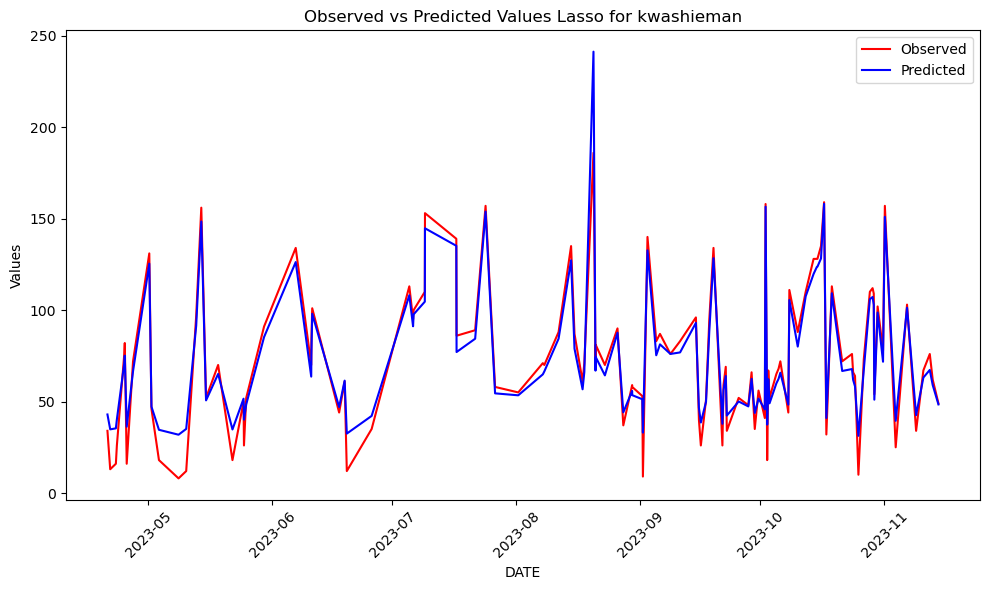

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path_to_your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/KWASHIEMAN pred LASSO.csv")

# Convert the 'Date' column to datetime format if needed
df['DATE'] = pd.to_datetime(df['DATE'])

# Select about 40% of the data for plotting
df_sample = df.sample(frac=0.03, random_state=42)

# Aggregate duplicate dates by averaging the values
df_sample = df_sample.groupby('DATE').mean().reset_index()

# Sort the dataframe by date for plotting
df_sample = df_sample.sort_values('DATE')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot observed values
plt.plot(df_sample['DATE'], df_sample['Observed_AQI'], label='Observed', color='red')

# Plot predicted values
plt.plot(df_sample['DATE'], df_sample['Predicted_lasso'], label='Predicted', color='blue')

# Add labels and title
plt.xlabel('DATE')
plt.ylabel('Values')
plt.title('Observed vs Predicted Values Lasso for kwashieman')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [ ]:
#Ridge regression

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.linear_model import Ridge
# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Convert 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

model = Ridge(alpha = 1)
model.fit(X_train, y_train)

Ridge(alpha=1)
# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['DATE'] = df.iloc[X_test.index]['DATE']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_lasso'] = y_pred_lasso

# Save the Lasso results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/KWASHIEMAN pred RIDGE.csv", index=False)


In [23]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
pred = model.predict(X_train)

print('Mean absolute error: {}'.format(mean_absolute_error((y_train), (pred))))
print('Root mean square error: {}'.format(np.sqrt(mean_squared_error((y_train), (pred)))))
print('R-squared: {}'.format(r2_score((y_train), (pred))))

Mean absolute error: 6.825357819254396
Root mean square error: 10.657027183623846
R-squared: 0.9158345027566057


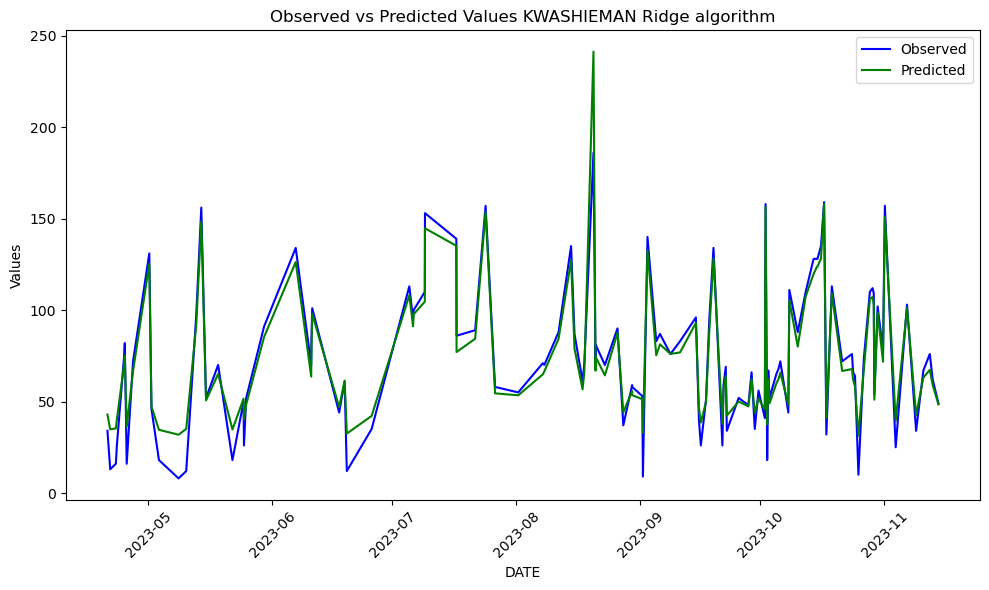

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path_to_your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/KWASHIEMAN pred RIDGE.csv")

# Convert the 'Date' column to datetime format if needed
df['DATE'] = pd.to_datetime(df['DATE'])

# Select about 40% of the data for plotting
df_sample = df.sample(frac=0.03, random_state=42)

# Aggregate duplicate dates by averaging the values
df_sample = df_sample.groupby('DATE').mean().reset_index()

# Sort the dataframe by date for plotting
df_sample = df_sample.sort_values('DATE')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot observed values
plt.plot(df_sample['DATE'], df_sample['Observed_AQI'], label='Observed', color='blue')

# Plot predicted values
plt.plot(df_sample['DATE'], df_sample['Predicted_lasso'], label='Predicted', color='green')

# Add labels and title
plt.xlabel('DATE')
plt.ylabel('Values')
plt.title('Observed vs Predicted Values KWASHIEMAN Ridge algorithm')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [ ]:
#SVR

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mean absolute error: 0.805984902747304
Root Mean Square Error: 5.284785796553701
R-squared: 0.9788300619701336


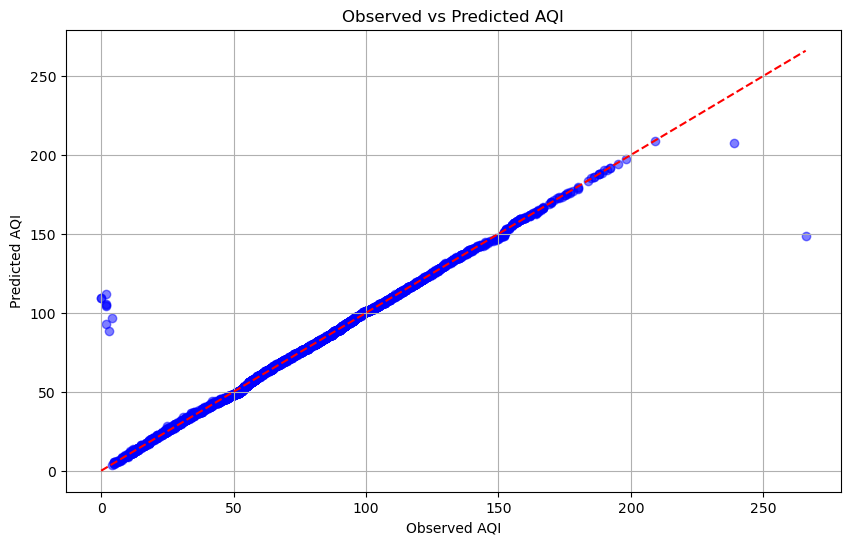

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize SVR and RandomizedSearchCV
svr = SVR()
random_search = RandomizedSearchCV(svr, param_distributions=param_distributions, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=101)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(scaled_X_train, y_train)

# Predict using the best estimator found by RandomizedSearchCV
y_pred = random_search.best_estimator_.predict(scaled_X_test)

# Calculate and print regression metrics
print('Mean absolute error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R-squared: {}'.format(r2_score(y_test, y_pred)))

# Plotting observed vs predicted values using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Observed AQI')
plt.ylabel('Predicted AQI')
plt.title('Observed vs Predicted AQI')
plt.grid(True)
plt.show()

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['DATE'] = df.iloc[X_test.index]['DATE']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_SVR'] = y_pred

# Save the SVR results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/KWASHIEMAN svr_predictions.csv", index=False)


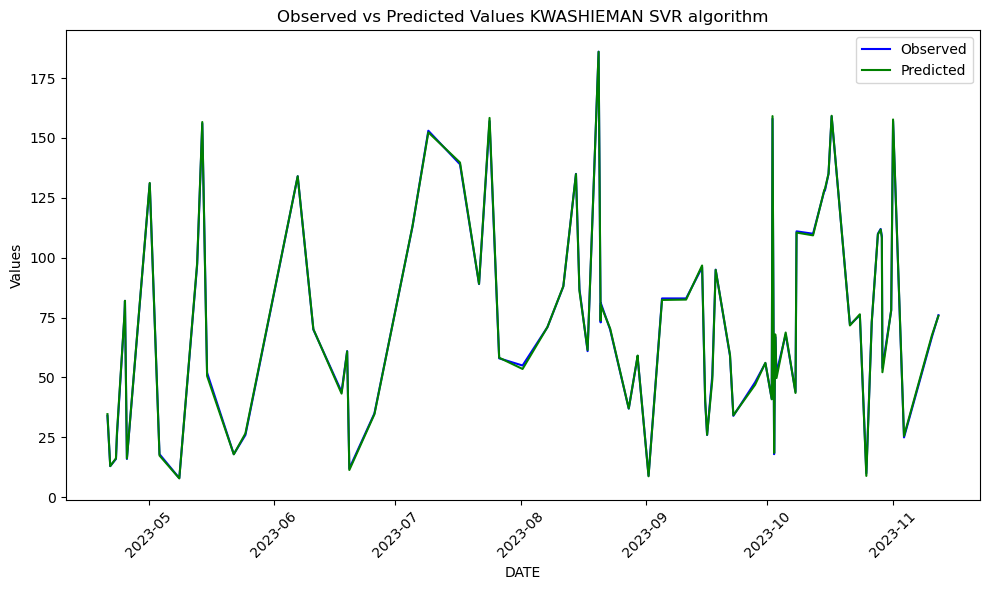

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path_to_your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/KWASHIEMAN svr_predictions.csv")

# Convert the 'Date' column to datetime format if needed
df['DATE'] = pd.to_datetime(df['DATE'])

# Select about 40% of the data for plotting
df_sample = df.sample(frac=0.02, random_state=42)

# Aggregate duplicate dates by averaging the values
df_sample = df_sample.groupby('DATE').mean().reset_index()

# Sort the dataframe by date for plotting
df_sample = df_sample.sort_values('DATE')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot observed values
plt.plot(df_sample['DATE'], df_sample['Observed_AQI'], label='Observed', color='blue')

# Plot predicted values
plt.plot(df_sample['DATE'], df_sample['Predicted_SVR'], label='Predicted', color='green')

# Add labels and title
plt.xlabel('DATE')
plt.ylabel('Values')
plt.title('Observed vs Predicted Values KWASHIEMAN SVR algorithm')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [ ]:
#Random forest regression

Mean Absolute Error: 0.023258138938733658
Root Mean Square Error: 0.12744094540412038
R-squared: 0.9999876892991643


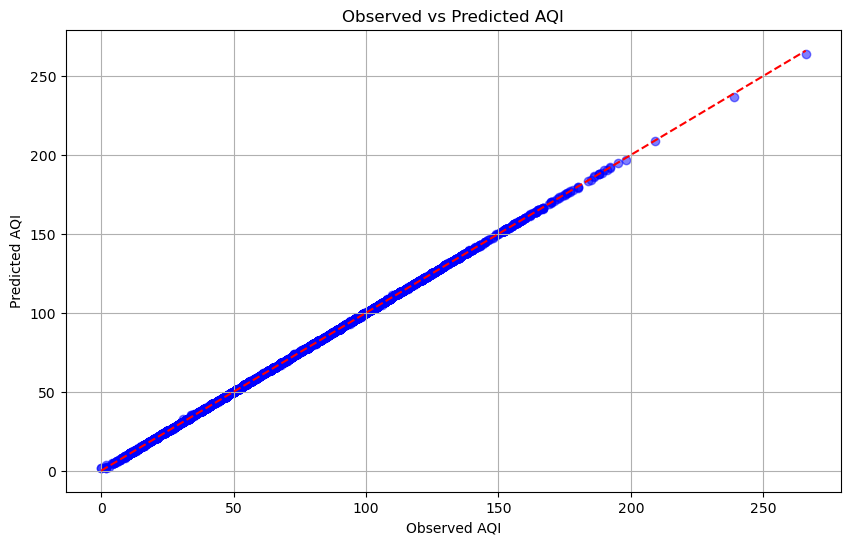

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Convert 'Date' column to datetime format (if necessary)
df['DATE'] = pd.to_datetime(df['DATE'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardize the features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=101)

# Fit the model to the training data
rfr.fit(scaled_X_train, y_train)

# Predict using the model
y_pred = rfr.predict(scaled_X_test)

# Calculate and print regression metrics
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R-squared: {}'.format(r2_score(y_test, y_pred)))

# Plotting observed vs predicted values using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Observed AQI')
plt.ylabel('Predicted AQI')
plt.title('Observed vs Predicted AQI')
plt.grid(True)
plt.show()

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['DATE'] = df.iloc[X_test.index]['DATE']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_RFR'] = y_pred

# Save the RFR results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/kwashieman rfr_predictions.csv", index=False)


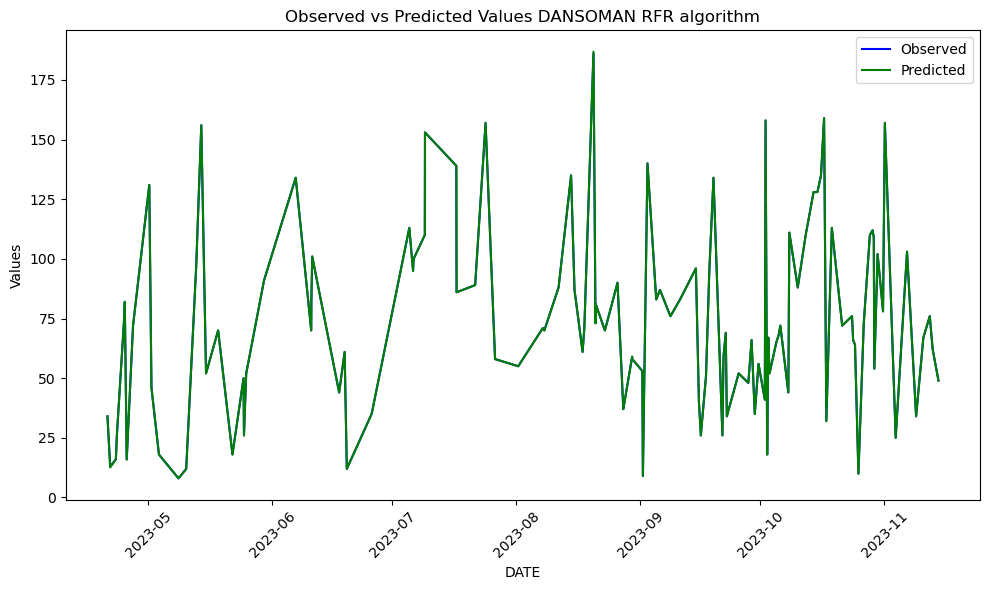

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path_to_your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman rfr_predictions.csv")

# Convert the 'Date' column to datetime format if needed
df['DATE'] = pd.to_datetime(df['DATE'])

# Select about 40% of the data for plotting
df_sample = df.sample(frac=0.03, random_state=42)

# Aggregate duplicate dates by averaging the values
df_sample = df_sample.groupby('DATE').mean().reset_index()

# Sort the dataframe by date for plotting
df_sample = df_sample.sort_values('DATE')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot observed values
plt.plot(df_sample['DATE'], df_sample['Observed_AQI'], label='Observed', color='blue')

# Plot predicted values
plt.plot(df_sample['DATE'], df_sample['Predicted_RFR'], label='Predicted', color='green')

# Add labels and title
plt.xlabel('DATE')
plt.ylabel('Values')
plt.title('Observed vs Predicted Values DANSOMAN RFR algorithm')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [ ]:
#CatBoost

0:	learn: 33.3361824	total: 161ms	remaining: 2m 40s
100:	learn: 1.5877031	total: 490ms	remaining: 4.36s
200:	learn: 1.3840921	total: 795ms	remaining: 3.16s
300:	learn: 1.3126158	total: 1.09s	remaining: 2.53s
400:	learn: 1.2800854	total: 1.38s	remaining: 2.06s
500:	learn: 1.2649221	total: 1.67s	remaining: 1.67s
600:	learn: 1.2566939	total: 1.99s	remaining: 1.32s
700:	learn: 1.2519633	total: 2.32s	remaining: 989ms
800:	learn: 1.2487795	total: 2.65s	remaining: 659ms
900:	learn: 1.2467041	total: 3.01s	remaining: 331ms
999:	learn: 1.2451892	total: 3.35s	remaining: 0us
Mean Absolute Error: 0.28364780080594915
Root Mean Square Error: 0.8098551130528989
R-squared: 0.9995028591329778


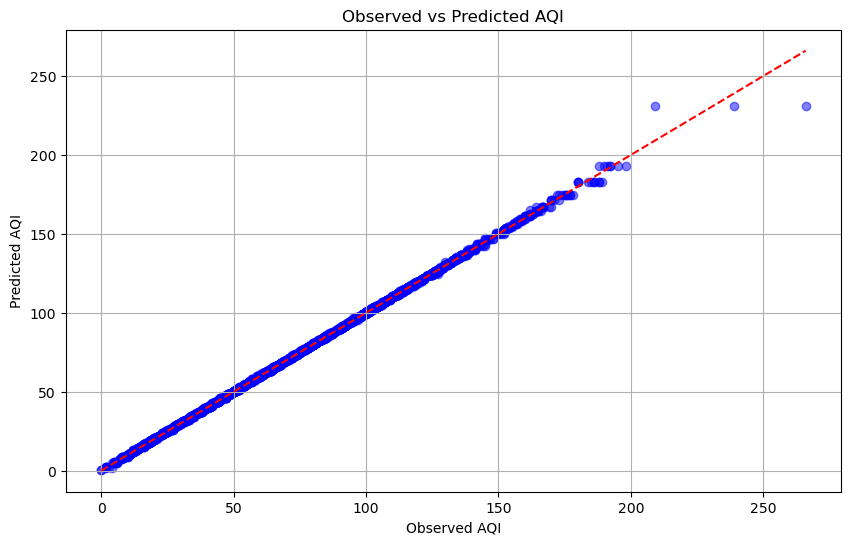

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman_cleaned.csv")

# Convert 'Date' column to datetime format (if necessary)
df['DATE'] = pd.to_datetime(df['DATE'])

# Define X and y
X = df[['PM2.5', 'PM10']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardize the features (if necessary)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize CatBoostRegressor
cbr = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_state=101, verbose=100)

# Train the model
cbr.fit(scaled_X_train, y_train)

# Predict using the trained model
y_pred = cbr.predict(scaled_X_test)

# Calculate and print regression metrics
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R-squared: {}'.format(r2_score(y_test, y_pred)))

# Plotting observed vs predicted values using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Observed AQI')
plt.ylabel('Predicted AQI')
plt.title('Observed vs Predicted AQI')
plt.grid(True)
plt.show()

# Create a DataFrame to store the test data and predictions
df_test = X_test.copy()
df_test['DATE'] = df.iloc[X_test.index]['DATE']  # Adding 'Date' column from original data
df_test['Observed_AQI'] = y_test
df_test['Predicted_CBR'] = y_pred

# Save the CBR results (date, observed values, predicted values) to a CSV file
df_test.to_csv("C:/Users/pc/Desktop/PROJECT/kwashieman cbr_predictions.csv", index=False)


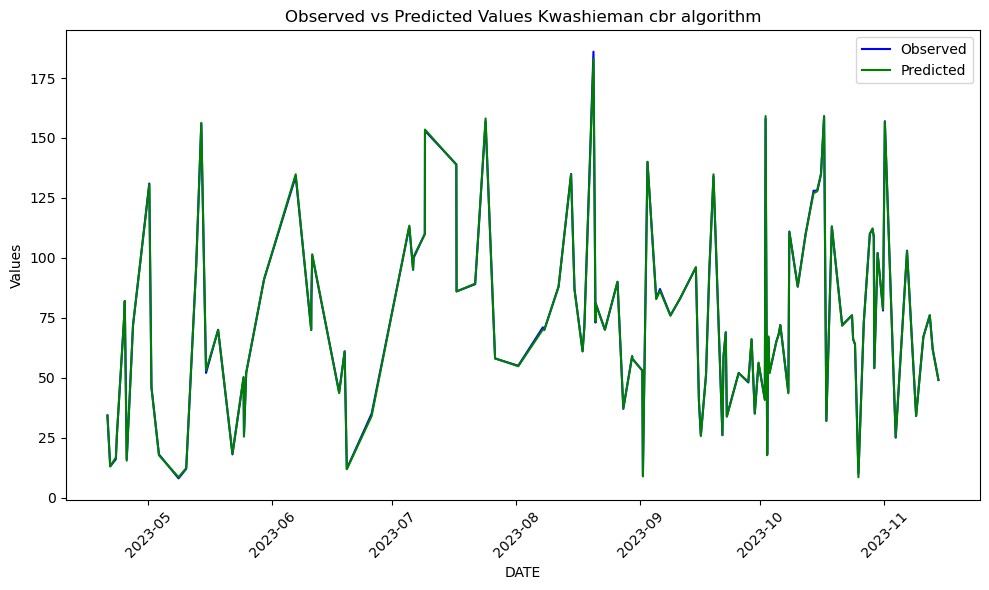

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path_to_your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv("C:/Users/pc/Desktop/PROJECT/kwashieman cbr_predictions.csv")

# Convert the 'Date' column to datetime format if needed
df['DATE'] = pd.to_datetime(df['DATE'])

# Select about 40% of the data for plotting
df_sample = df.sample(frac=0.03, random_state=42)

# Aggregate duplicate dates by averaging the values
df_sample = df_sample.groupby('DATE').mean().reset_index()

# Sort the dataframe by date for plotting
df_sample = df_sample.sort_values('DATE')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot observed values
plt.plot(df_sample['DATE'], df_sample['Observed_AQI'], label='Observed', color='blue')

# Plot predicted values
plt.plot(df_sample['DATE'], df_sample['Predicted_CBR'], label='Predicted', color='green')

# Add labels and title
plt.xlabel('DATE')
plt.ylabel('Values')
plt.title('Observed vs Predicted Values Kwashieman cbr algorithm')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
